# Exploratory Data Analysis
HTS data - `ROS1_all data randomised.xlsx`

## Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read data

In [2]:
df = pd.read_excel('../data/raw/ROS1_all data randomised.xlsx')
df.head()

,WELL,row,column,VALUE,Well type,CONTROL OUTLIER,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),CTRL NEG Median(VALUE),CTRL POS Mean(VALUE),...,CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score,ACTIVITY (above 30%),ACTIVITY (Z score above 3),Transfer Status
0,A01,1,1,12123,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,0.986831,0.075452,INACTIVE,Z score below 3,OK
1,A02,1,2,10507,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.909386,-0.543673,INACTIVE,Z score below 3,OK
2,A03,1,3,11176,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.124381,-0.287365,INACTIVE,Z score below 3,OK
3,A04,1,4,10564,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.842502,-0.521835,INACTIVE,Z score below 3,OK
4,A05,1,5,10408,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-1.025553,-0.581602,INACTIVE,Z score below 3,OK


## Data analysis

### Missing values and invalid entries

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   WELL                                6688 non-null   object 
 1   row                                 6688 non-null   int64  
 2   column                              6688 non-null   int64  
 3   VALUE                               6688 non-null   int64  
 4   Well type                           6688 non-null   object 
 5   CONTROL OUTLIER                     0 non-null      float64
 6   CTRL NEG Mean(VALUE)                6688 non-null   float64
 7   CTRL NEG Standard deviation(VALUE)  6688 non-null   float64
 8   CTRL NEG Median(VALUE)              6688 non-null   float64
 9   CTRL POS Mean(VALUE)                6688 non-null   float64
 10  CTRL POS Standard deviation(VALUE)  6688 non-null   float64
 11  CTRL POS Median(VALUE)              6688 no

It can be seen that feature `CONTROL OUTLIER` has only NaNs, so it may be dropped.

In [4]:
del df['CONTROL OUTLIER']

According to dr. Jacek Kolanowski, values other than **OK** in the column `Transfer Status` should be excluded. Errors could be caused by problems with the machine or reagents.

In [5]:
print(f"Deleted {len(df[df['Transfer Status'] != 'OK'])} rows")
df = df[df['Transfer Status'] == 'OK']

Deleted 15 rows


### Distributions
Examine how the `VALUE` is distributed.

count      6673.000000
mean      22069.847295
std       11043.148583
min        6419.000000
25%       12475.000000
50%       24368.000000
75%       26336.000000
max      167027.000000
Name: VALUE, dtype: float64
count    6673.000000
mean        0.372449
std         5.755673
min        -5.438950
25%        -0.940357
50%        -0.206928
75%         0.424393
max        98.860109
Name: % ACTIVATION, dtype: float64


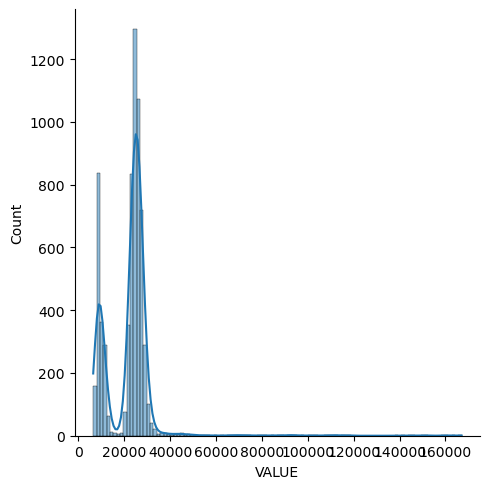

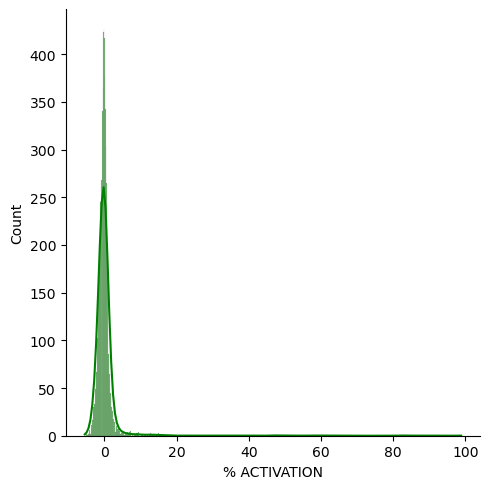

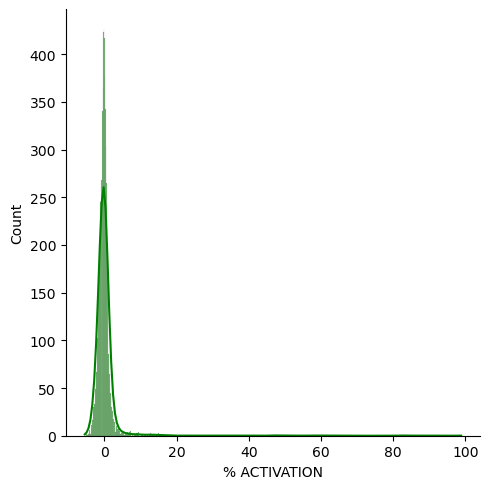

In [6]:
print(df['VALUE'].describe())
print(df['% ACTIVATION'].describe())

sns.displot(df['VALUE'], x=df['VALUE'], kde=True)
sns.displot(df['% ACTIVATION'], x=df['% ACTIVATION'], kde=True, color='green')

The `VALUE` values are distributed mostly around 22000 and 10000, with the long tail up to 160000.

Examine distributions of other numerical columns.

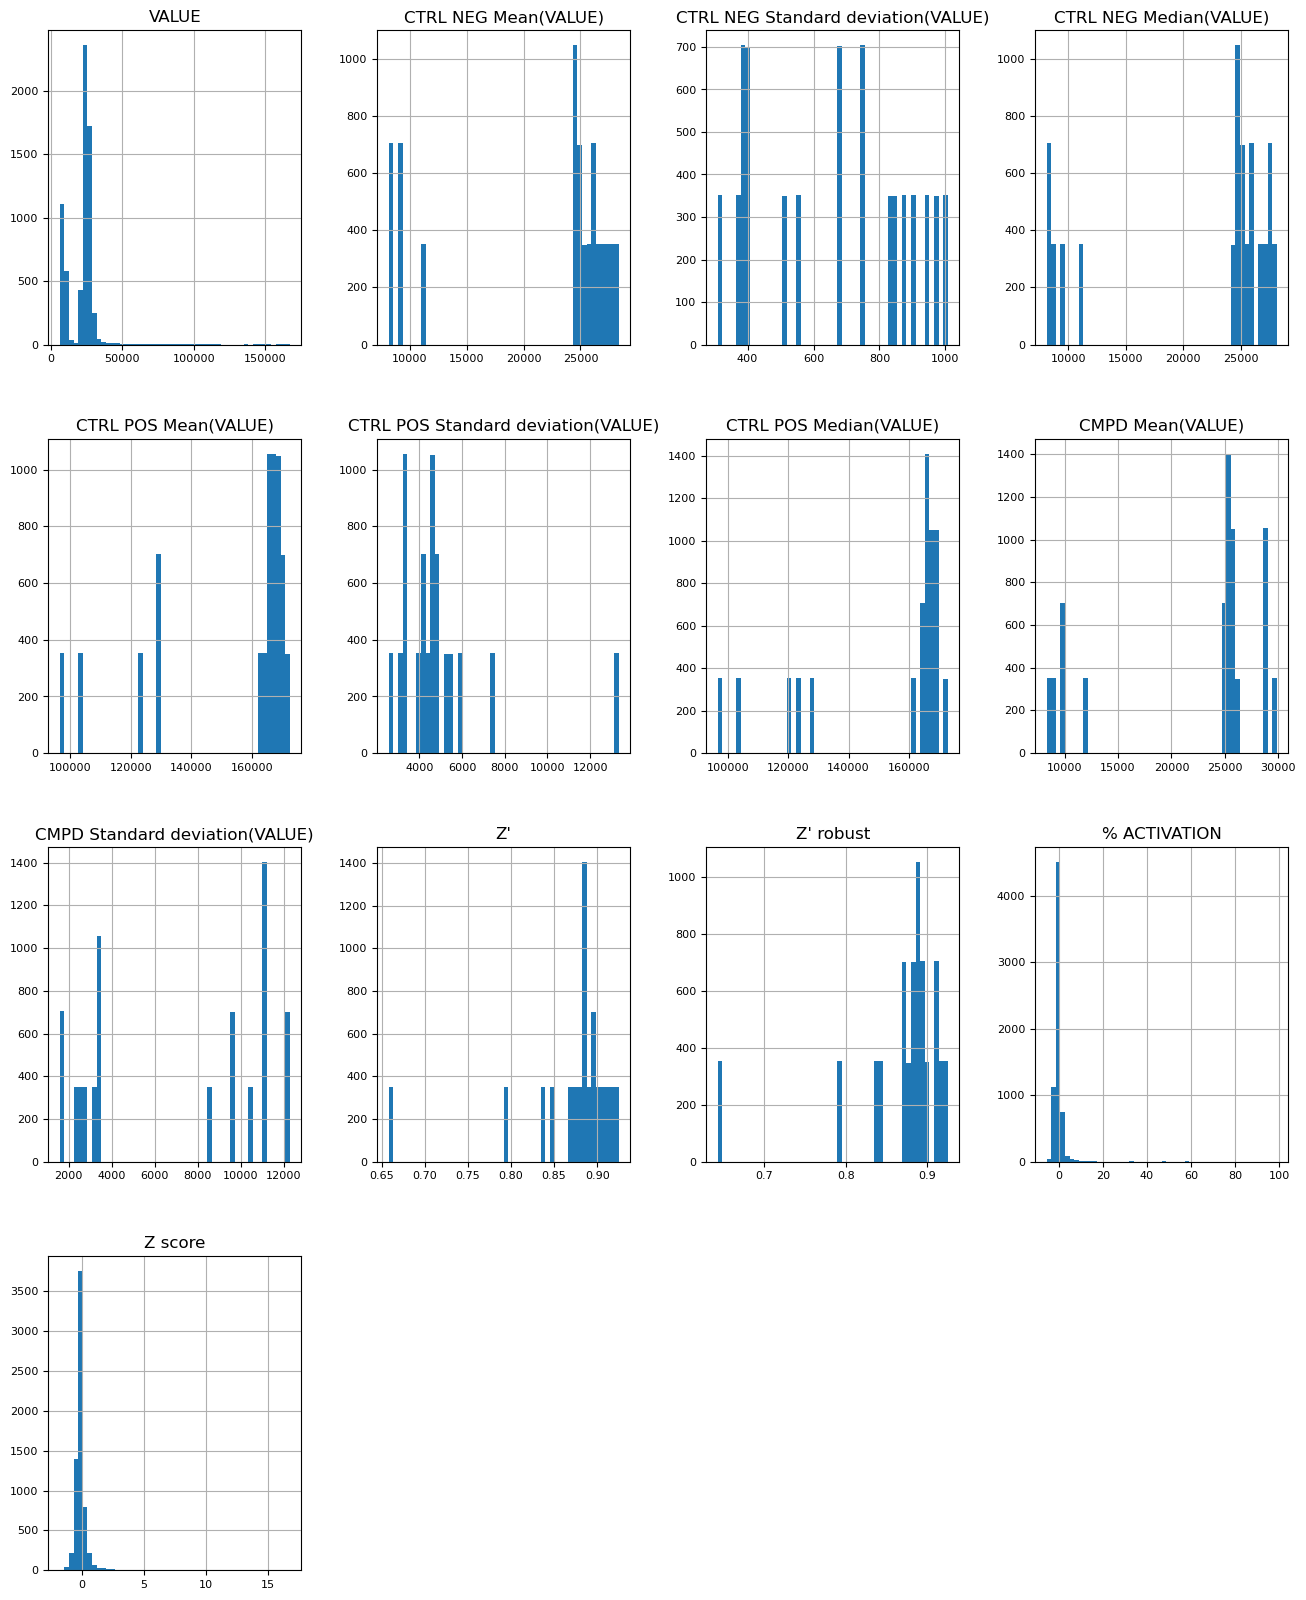

In [315]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
del df_num['row'], df_num['column']
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### Correlations

Verifying correlations with `VALUE`.

In [316]:
df_num_corr = df_num.corr()['VALUE'].sort_values(ascending=False)
df_num_corr

VALUE                                 1.000000
% ACTIVATION                          0.727137
CMPD Mean(VALUE)                      0.684672
CTRL NEG Mean(VALUE)                  0.680973
CTRL NEG Median(VALUE)                0.680884
CTRL POS Median(VALUE)                0.629813
Z score                               0.626699
CTRL POS Mean(VALUE)                  0.624088
CTRL NEG Standard deviation(VALUE)    0.512413
CMPD Standard deviation(VALUE)        0.499216
Z'                                    0.493490
Z' robust                             0.483105
CTRL POS Standard deviation(VALUE)   -0.381870
Name: VALUE, dtype: float64

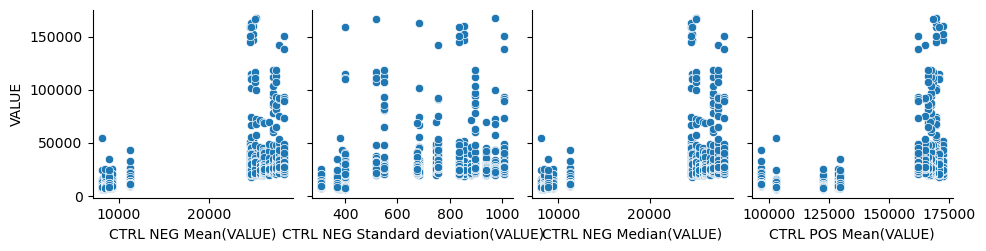

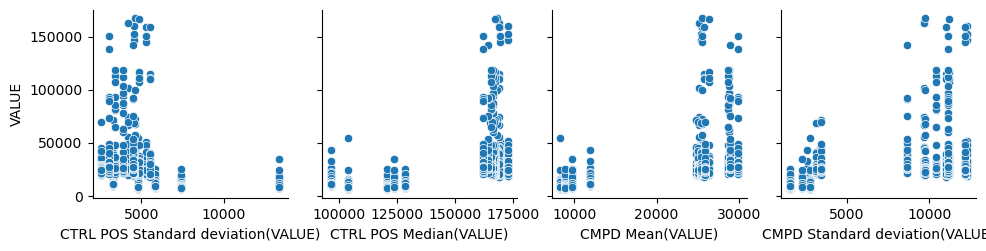

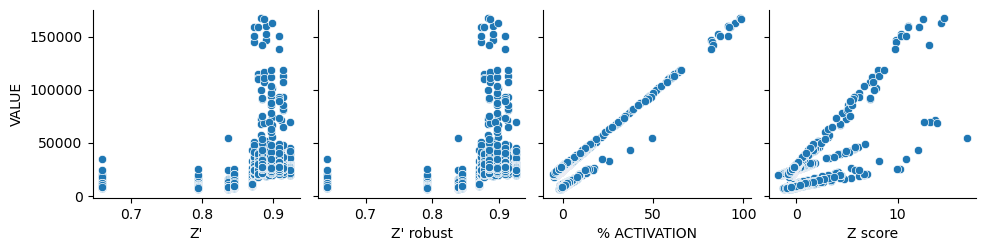

In [9]:
for i in range(1, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['VALUE'], diag_kind=None)

... and correlations with `% ACTIVATION`.

In [318]:
df_num_corr_act = df_num.corr()['% ACTIVATION'].sort_values(ascending=False)
df_num_corr_act

% ACTIVATION                          1.000000
Z score                               0.874945
VALUE                                 0.727137
CMPD Standard deviation(VALUE)        0.055749
CTRL POS Standard deviation(VALUE)    0.013850
CMPD Mean(VALUE)                      0.005389
CTRL NEG Mean(VALUE)                 -0.004838
CTRL NEG Median(VALUE)               -0.004900
CTRL POS Mean(VALUE)                 -0.010066
CTRL POS Median(VALUE)               -0.010723
Z' robust                            -0.013454
Z'                                   -0.013554
CTRL NEG Standard deviation(VALUE)   -0.019223
Name: % ACTIVATION, dtype: float64

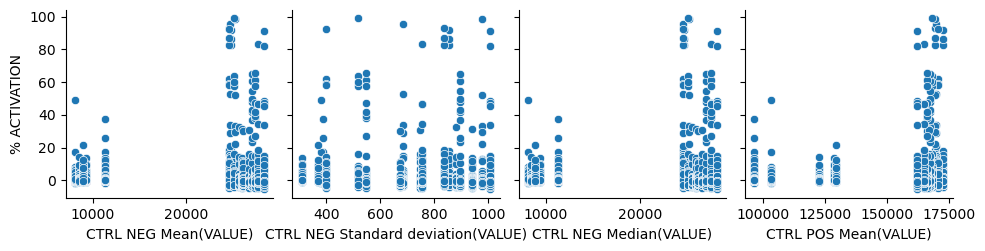

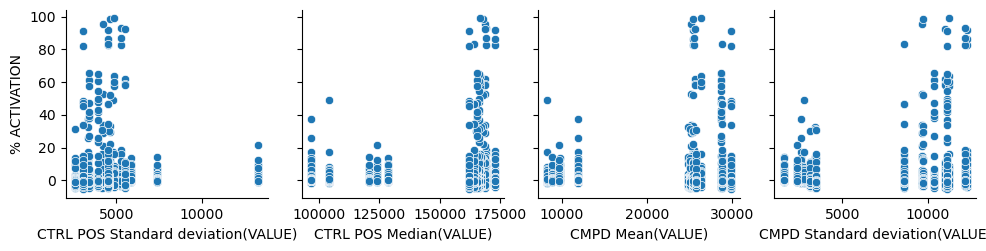

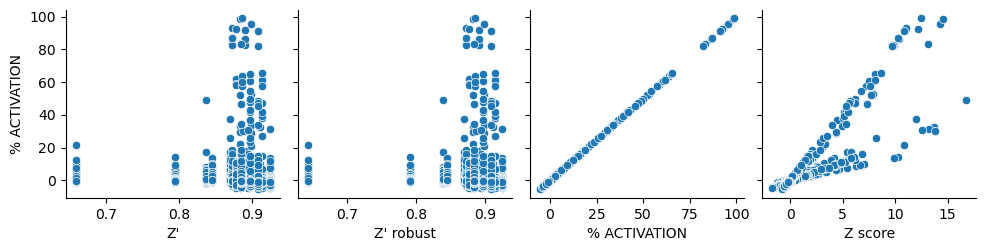

In [11]:
for i in range(1, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['% ACTIVATION'], diag_kind=None)

Feature to feature relationship

In [320]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient()

,row,column,VALUE,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),CTRL NEG Median(VALUE),CTRL POS Mean(VALUE),CTRL POS Standard deviation(VALUE),CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score
row,1.000000,-0.000310,0.015628,-0.000261,-0.000142,-0.000262,-0.000402,0.000048,-0.000389,-0.000261,-0.000449,-0.000176,-0.000170,0.022067,0.004398
column,-0.000310,1.000000,0.007258,0.001182,-0.000269,0.001190,0.001825,0.000117,0.001816,0.001333,0.002957,0.000603,0.000599,0.009939,0.013346
VALUE,0.015628,0.007258,1.000000,0.680973,0.512413,0.680884,0.624088,-0.381870,0.629813,0.684672,0.499216,0.493490,0.483105,0.727137,0.626699
CTRL NEG Mean(VALUE),-0.000261,0.001182,0.680973,1.000000,0.769525,0.999927,0.919142,-0.576131,0.928318,0.994607,0.668761,0.737359,0.722061,-0.004838,0.000021
CTRL NEG Standard deviation(VALUE),-0.000142,-0.000269,0.512413,0.769525,1.000000,0.764775,0.693056,-0.510044,0.705957,0.748527,0.459118,0.579322,0.568624,-0.019223,-0.000058
CTRL NEG Median(VALUE),-0.000262,0.001190,0.680884,0.999927,0.764775,1.000000,0.919199,-0.578551,0.928495,0.994475,0.667775,0.740270,0.725010,-0.004900,0.000022
CTRL POS Mean(VALUE),-0.000402,0.001825,0.624088,0.919142,0.693056,0.919199,1.000000,-0.325578,0.998567,0.911516,0.665069,0.551313,0.534771,-0.010066,0.000024
CTRL POS Standard deviation(VALUE),0.000048,0.000117,-0.381870,-0.576131,-0.510044,-0.578551,-0.325578,1.000000,-0.370525,-0.557794,-0.285162,-0.963570,-0.967364,0.013850,0.000021
CTRL POS Median(VALUE),-0.000389,0.001816,0.629813,0.928318,0.705957,0.928495,0.998567,-0.370525,1.000000,0.919882,0.669684,0.590839,0.575139,-0.010723,0.000021
CMPD Mean(VALUE),-0.000261,0.001333,0.684672,0.994607,0.748527,0.994475,0.911516,-0.557794,0.919882,1.000000,0.729098,0.720801,0.705634,0.005389,0.000027


## Conclusions
* `VALUE` and `% ACTIVATION` have similar distributions, and their correlation is 0.62
* `% ACTIVATION` is strongly (0.87) correlated with `Z score` and there is no correlation with other features (except `VALUE` mentioned above)
* columns describing statistics (like `CTRL NEG Median(VALUE)`) are correlated between themselves, but show no significant influence on `VALUE` or `% ACTIVATION`

# Dependencies between datasets

### Read data

In [321]:
df_ros1 = pd.read_excel('../data/raw/ROS1_all data randomised.xlsx')
df_hits_dtt = pd.read_excel('../data/raw/ROS hits - anonymised.xlsx', 0)
df_hits_tcep = pd.read_excel('../data/raw/ROS hits - anonymised.xlsx', 1)
df_hits_hrp = pd.read_excel('../data/raw/ROS hits - anonymised.xlsx', 2)
df_ros1_dtt = pd.read_excel('../data/raw/ROS1_DTT_fanonymised_limited.xlsx')
df_ros2_hrp = pd.read_excel('../data/raw/ROS2_HRP anonymised limited.xlsx')


### Analysis of differences between ROS1 datasets

In [322]:
df_ros1.head()

,WELL,row,column,VALUE,Well type,CONTROL OUTLIER,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),CTRL NEG Median(VALUE),CTRL POS Mean(VALUE),...,CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score,ACTIVITY (above 30%),ACTIVITY (Z score above 3),Transfer Status
0,A01,1,1,12123,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,0.986831,0.075452,INACTIVE,Z score below 3,OK
1,A02,1,2,10507,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.909386,-0.543673,INACTIVE,Z score below 3,OK
2,A03,1,3,11176,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.124381,-0.287365,INACTIVE,Z score below 3,OK
3,A04,1,4,10564,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-0.842502,-0.521835,INACTIVE,Z score below 3,OK
4,A05,1,5,10408,CMPD,NaN,11282.0,388.181361,11274.5,96504.3125,...,96602.5,11926.059659,2610.13325,0.870037,0.870198,-1.025553,-0.581602,INACTIVE,Z score below 3,OK


In [323]:
df_ros1_dtt.head()

,DTT - compound ID,Barcode assay plate,WELL,row,column,VALUE,Well type,CONTROL OUTLIER,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),...,CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score,ACTIVITY (above 30%),ACTIVITY (Z score above 3),Transfer Status
0,102092,B1007L2002L03DTT1,P22,16,22,27269,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.340947,-0.184345,INACTIVE,Z score below 3,OK
1,102092,B1007L2002L03DTT2,P22,16,22,27290,CMPD,NaN,28370.875,1007.138182,...,162158.5,29852.036932,11132.901953,0.908973,0.909246,-0.808767,-0.230132,INACTIVE,Z score below 3,OK
2,102091,B1007L2002L03DTT1,N22,14,22,27128,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.443750,-0.200703,INACTIVE,Z score below 3,OK
3,102091,B1007L2002L03DTT2,N22,14,22,26992,CMPD,NaN,28370.875,1007.138182,...,162158.5,29852.036932,11132.901953,0.908973,0.909246,-1.031746,-0.256899,INACTIVE,Z score below 3,OK
4,102090,B1007L2002L03DTT1,L22,12,22,27276,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.335843,-0.183533,INACTIVE,Z score below 3,OK


In [324]:
print("Columns added in ROS1_DTT: ", set(df_ros1_dtt.columns)-set(df_ros1.columns))

Columns added in ROS1_DTT:  {'Barcode assay plate', 'DTT  - compound ID'}


In [325]:
df_ros1_dtt.merge(df_ros1, 'left', on = list(df_ros1.columns)).head()

,DTT - compound ID,Barcode assay plate,WELL,row,column,VALUE,Well type,CONTROL OUTLIER,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),...,CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score,ACTIVITY (above 30%),ACTIVITY (Z score above 3),Transfer Status
0,102092,B1007L2002L03DTT1,P22,16,22,27269,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.340947,-0.184345,INACTIVE,Z score below 3,OK
1,102092,B1007L2002L03DTT2,P22,16,22,27290,CMPD,NaN,28370.875,1007.138182,...,162158.5,29852.036932,11132.901953,0.908973,0.909246,-0.808767,-0.230132,INACTIVE,Z score below 3,OK
2,102091,B1007L2002L03DTT1,N22,14,22,27128,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.443750,-0.200703,INACTIVE,Z score below 3,OK
3,102091,B1007L2002L03DTT2,N22,14,22,26992,CMPD,NaN,28370.875,1007.138182,...,162158.5,29852.036932,11132.901953,0.908973,0.909246,-1.031746,-0.256899,INACTIVE,Z score below 3,OK
4,102090,B1007L2002L03DTT1,L22,12,22,27276,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.335843,-0.183533,INACTIVE,Z score below 3,OK


In [326]:
print("Number of rows in \"ROS1_all data randomised.xlsx\": ", df_ros1.shape[0])
print("Number of rows in \"ROS1_DTT_fanonymised_limited.xlsx\": ", df_ros1_dtt.shape[0])
print("Number of rows when both data sets are merged: ", df_ros1_dtt.merge(df_ros1, 'outer', on = list(df_ros1.columns)).shape[0])
print("Number of rows without 'DTT - compound ID' and 'Barcode assay plate': ", df_ros1_dtt.merge(df_ros1, 'outer', on = list(df_ros1.columns)).shape[0] - df_ros1_dtt.merge(df_ros1, 'inner', on = list(df_ros1.columns)).shape[0])

Number of rows in "ROS1_all data randomised.xlsx":  6688
Number of rows in "ROS1_DTT_fanonymised_limited.xlsx":  4752
Number of rows when both data sets are merged:  6688
Number of rows without 'DTT - compound ID' and 'Barcode assay plate':  1936


Number of rows in outer merged dataframe are the same as in "ROS1_all data randomised.xlsx" so it means that data in both is consistent but in "ROS1_DTT_fanonymised_limited.xlsx" there are a 1936 fewer rows. Moreover in ROS1_DTT there are two new columns 'DTT - compound ID' and 'Barcode assay plate'

### Analysis of ROS hits

In [327]:
df_hits_dtt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DTT - compound ID                 457 non-null    int64  
 1   Source_vial_barcode               457 non-null    object 
 2   Mean(% ACTIVATION)                457 non-null    float64
 3   Standard deviation(% ACTIVATION)  457 non-null    float64
 4   Mean(Z score)                     457 non-null    float64
 5   Standard deviation(Z score)       457 non-null    float64
 6   ACTIVITY                          457 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 25.1+ KB


In [328]:
df_hits_tcep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TCEP - compound ID                733 non-null    int64  
 1   Source_vial_barcode               733 non-null    object 
 2   Mean(% ACTIVATION)                733 non-null    float64
 3   Standard deviation(% ACTIVATION)  733 non-null    float64
 4   Mean(Z score)                     733 non-null    float64
 5   Standard deviation(Z score)       733 non-null    float64
 6   ACTIVITY                          733 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 40.2+ KB


In [329]:
df_hits_hrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HRP - compound ID                 99 non-null     int64  
 1   Source_vial_barcode               99 non-null     object 
 2   Mean(% ACTIVATION)                99 non-null     float64
 3   Standard deviation(% ACTIVATION)  99 non-null     float64
 4   Mean(Z score)                     99 non-null     float64
 5   Standard deviation(Z score)       99 non-null     float64
 6   ACTIVITY                          99 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.5+ KB


In [330]:
print("DTT and TCEP: ",set(df_hits_dtt['DTT - compound ID']).intersection(set(df_hits_tcep['TCEP - compound ID'])))
print("DTT and HRP: ",set(df_hits_dtt['DTT - compound ID']).intersection(set(df_hits_hrp['HRP - compound ID'])))
print("HRP and TCEP: ",set(df_hits_hrp['HRP - compound ID']).intersection(set(df_hits_tcep['TCEP - compound ID'])))

DTT and TCEP:  set()
DTT and HRP:  {98208, 98213}
HRP and TCEP:  set()


#### We have only two common ID between DTT and HRP, but it's possible that all three compound ID are connected

In [331]:
print("Number of rows in DTT: ", df_hits_dtt.shape[0])
print("Number of rows in HRP: ", df_hits_hrp.shape[0])
print("Number of rows in TCEP: ", df_hits_tcep.shape[0])

Number of rows in DTT:  457
Number of rows in HRP:  99
Number of rows in TCEP:  733


In [332]:
print("Unique ID in DTT: ", df_hits_dtt['DTT - compound ID'].nunique())
print("Unique ID in HRP: ", df_hits_hrp['HRP - compound ID'].nunique())
print("Unique ID in TCEP: ", df_hits_tcep['TCEP - compound ID'].nunique())

Unique ID in DTT:  456
Unique ID in HRP:  98
Unique ID in TCEP:  733


#### In both DTT and HRP it is one duplicated ID

### Analysis of relation between ROS1 and ROS hits

In [333]:
df_hits_dtt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DTT - compound ID                 457 non-null    int64  
 1   Source_vial_barcode               457 non-null    object 
 2   Mean(% ACTIVATION)                457 non-null    float64
 3   Standard deviation(% ACTIVATION)  457 non-null    float64
 4   Mean(Z score)                     457 non-null    float64
 5   Standard deviation(Z score)       457 non-null    float64
 6   ACTIVITY                          457 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 25.1+ KB


In [334]:
df_hits_dtt.head()

,DTT - compound ID,Source_vial_barcode,Mean(% ACTIVATION),Standard deviation(% ACTIVATION),Mean(Z score),Standard deviation(Z score),ACTIVITY
0,101782,LV2001692398,47.542648,1.563835,6.482729,1.097111,ACTIVE DTT
1,101619,LV2001693307,55.974251,2.246694,7.142075,0.617005,ACTIVE DTT
2,101484,LV2001693180,40.245843,1.779545,5.087943,0.008106,ACTIVE DTT
3,101373,LV2001692973,12.379977,1.840790,5.479987,0.431151,ACTIVE DTT
4,100962,LV2001689476,12.983435,1.595773,5.609847,0.622350,ACTIVE DTT


In [335]:
df_ros1_dtt.head()

,DTT - compound ID,Barcode assay plate,WELL,row,column,VALUE,Well type,CONTROL OUTLIER,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),...,CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score,ACTIVITY (above 30%),ACTIVITY (Z score above 3),Transfer Status
0,102092,B1007L2002L03DTT1,P22,16,22,27269,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.340947,-0.184345,INACTIVE,Z score below 3,OK
1,102092,B1007L2002L03DTT2,P22,16,22,27290,CMPD,NaN,28370.875,1007.138182,...,162158.5,29852.036932,11132.901953,0.908973,0.909246,-0.808767,-0.230132,INACTIVE,Z score below 3,OK
2,102091,B1007L2002L03DTT1,N22,14,22,27128,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.443750,-0.200703,INACTIVE,Z score below 3,OK
3,102091,B1007L2002L03DTT2,N22,14,22,26992,CMPD,NaN,28370.875,1007.138182,...,162158.5,29852.036932,11132.901953,0.908973,0.909246,-1.031746,-0.256899,INACTIVE,Z score below 3,OK
4,102090,B1007L2002L03DTT1,L22,12,22,27276,CMPD,NaN,27736.625,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,-0.335843,-0.183533,INACTIVE,Z score below 3,OK


#### Checking intersection between ROS hits DTT and ROS1 DTT

In [336]:
common_id = set(df_hits_dtt['DTT - compound ID']).intersection(set(df_ros1_dtt['DTT  - compound ID']))
print("ID common in ROS1 DTT and ROS hits DTT: ", common_id)


ID common in ROS1 DTT and ROS hits DTT:  {100962, 101484, 100497, 101619, 99988, 101782, 101373}


In [337]:
common_hits = df_hits_dtt[(df_hits_dtt['DTT - compound ID'].isin(common_id))]
common_hits

,DTT - compound ID,Source_vial_barcode,Mean(% ACTIVATION),Standard deviation(% ACTIVATION),Mean(Z score),Standard deviation(Z score),ACTIVITY
0,101782,LV2001692398,47.542648,1.563835,6.482729,1.097111,ACTIVE DTT
1,101619,LV2001693307,55.974251,2.246694,7.142075,0.617005,ACTIVE DTT
2,101484,LV2001693180,40.245843,1.779545,5.087943,0.008106,ACTIVE DTT
3,101373,LV2001692973,12.379977,1.840790,5.479987,0.431151,ACTIVE DTT
4,100962,LV2001689476,12.983435,1.595773,5.609847,0.622350,ACTIVE DTT
5,100497,LV2001694070,58.180714,1.001978,7.460731,0.342723,ACTIVE DTT
6,99988,LV2001695600,21.721239,0.765064,3.206790,0.104214,ACTIVE DTT


In [338]:
common_ros = df_ros1_dtt[(df_ros1_dtt['DTT  - compound ID'].isin(common_id))]
common_ros

,DTT - compound ID,Barcode assay plate,WELL,row,column,VALUE,Well type,CONTROL OUTLIER,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),...,CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score,ACTIVITY (above 30%),ACTIVITY (Z score above 3),Transfer Status
620,101782,B1007L2002L03DTT1,C11,3,11,91427,CMPD,NaN,27736.6250,755.536355,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,46.436850,7.258504,ACTIVE,Z score above 3,OK
621,101782,B1007L2002L03DTT2,C11,3,11,93387,CMPD,NaN,28370.8750,1007.138182,...,162158.5,29852.036932,11132.901953,0.908973,0.909246,48.648446,5.706954,ACTIVE,Z score above 3,OK
946,101619,B1006L2002L03DTT1,N13,14,13,103259,CMPD,NaN,27085.3750,896.311097,...,166348.0,28740.852273,11112.515100,0.897284,0.896810,54.385599,6.705786,ACTIVE,Z score above 3,OK
947,101619,B1006L2002L03DTT2,N13,14,13,107275,CMPD,NaN,27444.7500,547.487899,...,165592.5,28703.286932,10367.899857,0.914530,0.914187,57.562904,7.578363,ACTIVE,Z score above 3,OK
1216,101484,B1006L2002L03DTT1,O02,15,2,85217,CMPD,NaN,27085.3750,896.311097,...,166348.0,28740.852273,11112.515100,0.897284,0.896810,41.504172,5.082211,ACTIVE,Z score above 3,OK
1217,101484,B1006L2002L03DTT2,O02,15,2,81514,CMPD,NaN,27444.7500,547.487899,...,165592.5,28703.286932,10367.899857,0.914530,0.914187,38.987515,5.093675,ACTIVE,Z score above 3,OK
1438,101373,B1005L2002L03DTT1,B20,2,20,41565,CMPD,NaN,26076.7500,673.508179,...,165239.0,25386.718750,3126.166817,0.887522,0.886980,11.078343,5.175118,INACTIVE,Z score above 3,OK
1439,101373,B1005L2002L03DTT2,B20,2,20,45879,CMPD,NaN,26711.4375,745.668825,...,165775.0,25820.818182,3467.359996,0.895014,0.894329,13.681612,5.784857,INACTIVE,Z score above 3,OK
2260,100962,B1004L2002L03DTT1,L04,12,4,45630,CMPD,NaN,25656.8750,881.486160,...,167171.5,24843.042614,3435.909164,0.911358,0.911481,14.111817,6.049915,INACTIVE,Z score above 3,OK
2261,100962,B1004L2002L03DTT2,L04,12,4,42626,CMPD,NaN,25994.2500,937.697428,...,166585.0,25086.562500,3392.686137,0.925019,0.925240,11.855053,5.169779,INACTIVE,Z score above 3,OK


#### Analysing intersection of ROS1 and ROS hits

In [339]:
df_merged_dtt = df_hits_dtt.merge(df_ros1_dtt, 'inner', left_on=['DTT - compound ID'], right_on=['DTT  - compound ID'])
df_merged_dtt.head()

,DTT - compound ID,Source_vial_barcode,Mean(% ACTIVATION),Standard deviation(% ACTIVATION),Mean(Z score),Standard deviation(Z score),ACTIVITY,DTT - compound ID,Barcode assay plate,WELL,...,CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score,ACTIVITY (above 30%),ACTIVITY (Z score above 3),Transfer Status
0,101782,LV2001692398,47.542648,1.563835,6.482729,1.097111,ACTIVE DTT,101782,B1007L2002L03DTT1,C11,...,164236.0,28858.073864,8620.085885,0.885165,0.884817,46.436850,7.258504,ACTIVE,Z score above 3,OK
1,101782,LV2001692398,47.542648,1.563835,6.482729,1.097111,ACTIVE DTT,101782,B1007L2002L03DTT2,C11,...,162158.5,29852.036932,11132.901953,0.908973,0.909246,48.648446,5.706954,ACTIVE,Z score above 3,OK
2,101619,LV2001693307,55.974251,2.246694,7.142075,0.617005,ACTIVE DTT,101619,B1006L2002L03DTT1,N13,...,166348.0,28740.852273,11112.515100,0.897284,0.896810,54.385599,6.705786,ACTIVE,Z score above 3,OK
3,101619,LV2001693307,55.974251,2.246694,7.142075,0.617005,ACTIVE DTT,101619,B1006L2002L03DTT2,N13,...,165592.5,28703.286932,10367.899857,0.914530,0.914187,57.562904,7.578363,ACTIVE,Z score above 3,OK
4,101484,LV2001693180,40.245843,1.779545,5.087943,0.008106,ACTIVE DTT,101484,B1006L2002L03DTT1,O02,...,166348.0,28740.852273,11112.515100,0.897284,0.896810,41.504172,5.082211,ACTIVE,Z score above 3,OK


In [340]:
corr = df_merged_dtt.corr(numeric_only=True)
corr.style.background_gradient()

c:\Users\Endrj\anaconda3\envs\drug-screening\lib\site-packages\pandas\io\formats\style.py:3925: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Endrj\anaconda3\envs\drug-screening\lib\site-packages\pandas\io\formats\style.py:3926: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,DTT - compound ID,Mean(% ACTIVATION),Standard deviation(% ACTIVATION),Mean(Z score),Standard deviation(Z score),DTT - compound ID,row,column,VALUE,CONTROL OUTLIER,CTRL NEG Mean(VALUE),CTRL NEG Standard deviation(VALUE),CTRL NEG Median(VALUE),CTRL POS Mean(VALUE),CTRL POS Standard deviation(VALUE),CTRL POS Median(VALUE),CMPD Mean(VALUE),CMPD Standard deviation(VALUE),Z',Z' robust,% ACTIVATION,Z score
DTT - compound ID,1.000000,0.246450,0.871185,0.479646,0.541587,1.000000,-0.376440,0.211237,0.243114,nan,0.916375,0.151521,0.920584,-0.804789,-0.424028,-0.827473,0.737296,-0.045893,0.318467,0.323787,0.245971,0.458949
Mean(% ACTIVATION),0.246450,1.000000,0.102695,0.690551,0.184841,0.246450,0.106363,0.303868,0.997829,nan,0.269479,-0.400071,0.281440,-0.048867,0.261539,-0.135934,0.670980,0.839581,-0.213450,-0.215559,0.998057,0.660754
Standard deviation(% ACTIVATION),0.871185,0.102695,1.000000,0.412721,0.321143,0.871185,-0.105341,0.183081,0.104129,nan,0.725804,0.113327,0.745302,-0.559381,-0.489039,-0.554807,0.514741,-0.187093,0.445808,0.445927,0.102495,0.394912
Mean(Z score),0.479646,0.690551,0.412721,1.000000,0.530795,0.479646,-0.322871,0.694136,0.691278,nan,0.274725,-0.366935,0.286027,-0.259334,0.092814,-0.296753,0.383214,0.205331,-0.045975,-0.045018,0.689209,0.956850
Standard deviation(Z score),0.541587,0.184841,0.321143,0.530795,1.000000,0.541587,-0.592378,0.310003,0.172374,nan,0.508578,0.285200,0.475045,-0.685367,-0.278846,-0.659377,0.338969,-0.152647,0.144770,0.156554,0.184481,0.507891
DTT - compound ID,1.000000,0.246450,0.871185,0.479646,0.541587,1.000000,-0.376440,0.211237,0.243114,nan,0.916375,0.151521,0.920584,-0.804789,-0.424028,-0.827473,0.737296,-0.045893,0.318467,0.323787,0.245971,0.458949
row,-0.376440,0.106363,-0.105341,-0.322871,-0.592378,-0.376440,1.000000,-0.678662,0.109757,nan,-0.253600,0.023241,-0.242743,0.494718,-0.211104,0.561985,-0.021635,0.385463,0.320190,0.311030,0.106156,-0.308939
column,0.211237,0.303868,0.183081,0.694136,0.310003,0.211237,-0.678662,1.000000,0.308561,nan,-0.027155,-0.485647,-0.004619,-0.054020,0.496835,-0.160318,-0.026301,-0.091987,-0.459628,-0.459851,0.303277,0.664184
VALUE,0.243114,0.997829,0.104129,0.691278,0.172374,0.243114,0.109757,0.308561,1.000000,nan,0.265382,-0.403542,0.276983,-0.034145,0.267056,-0.124095,0.665513,0.838942,-0.216791,-0.219313,0.999742,0.668961
CONTROL OUTLIER,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


#### Checking compatibility non-numerical columns

In [341]:
print(df_merged_dtt[['ACTIVITY', 'ACTIVITY (above 30%)']])

      ACTIVITY ACTIVITY (above 30%)
0   ACTIVE DTT               ACTIVE
1   ACTIVE DTT               ACTIVE
2   ACTIVE DTT               ACTIVE
3   ACTIVE DTT               ACTIVE
4   ACTIVE DTT               ACTIVE
5   ACTIVE DTT               ACTIVE
6   ACTIVE DTT             INACTIVE
7   ACTIVE DTT             INACTIVE
8   ACTIVE DTT             INACTIVE
9   ACTIVE DTT             INACTIVE
10  ACTIVE DTT               ACTIVE
11  ACTIVE DTT               ACTIVE
12  ACTIVE DTT             INACTIVE
13  ACTIVE DTT             INACTIVE


#### Checking compatibility numerical columns

In [342]:
print("Mean(% ACTIVATION) is from ROS hits. % ACTIVATION is from ROS DTT")
print(df_merged_dtt[['Mean(% ACTIVATION)', '% ACTIVATION']])

Mean(% ACTIVATION) is from ROS hits. % ACTIVATION is from ROS DTT
    Mean(% ACTIVATION)  % ACTIVATION
0            47.542648     46.436850
1            47.542648     48.648446
2            55.974251     54.385599
3            55.974251     57.562904
4            40.245843     41.504172
5            40.245843     38.987515
6            12.379977     11.078343
7            12.379977     13.681612
8            12.983435     14.111817
9            12.983435     11.855053
10           58.180714     58.889219
11           58.180714     57.472208
12           21.721239     21.180257
13           21.721239     22.262221


It is easy to spot that both columns are strongly related

In [343]:
df_merged_dtt.groupby('DTT - compound ID').mean()[['Mean(% ACTIVATION)', '% ACTIVATION']]

C:\Users\Endrj\AppData\Local\Temp\ipykernel_12708\2585612174.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged_dtt.groupby('DTT - compound ID').mean()[['Mean(% ACTIVATION)', '% ACTIVATION']]


,Mean(% ACTIVATION),% ACTIVATION
DTT - compound ID,,
99988,21.721239,21.721239
100497,58.180714,58.180714
100962,12.983435,12.983435
101373,12.379977,12.379977
101484,40.245843,40.245843
101619,55.974251,55.974251
101782,47.542648,47.542648


#### Conclusion
There are only 7 common ID between ROS1 DTT and ROS hits DTT.
Each ID is unique in ROS hits but occurs twice in ROS1 DTT. There are no other common columns. There are some relations between datasets, for example a large correlation between Mean(% ACTIVATION) and % ACTIVATION and VALUE. Second observation is fact that Mean(% ACTIVATION) from ROS hits is mean of values % ACTIVATION from ROS DTT. 

### Analysis of relation between ROS2 and ROS hits

In [344]:
df_hits_hrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HRP - compound ID                 99 non-null     int64  
 1   Source_vial_barcode               99 non-null     object 
 2   Mean(% ACTIVATION)                99 non-null     float64
 3   Standard deviation(% ACTIVATION)  99 non-null     float64
 4   Mean(Z score)                     99 non-null     float64
 5   Standard deviation(Z score)       99 non-null     float64
 6   ACTIVITY                          99 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.5+ KB


In [345]:
df_ros2_hrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HRP - compound ID                   5632 non-null   int64  
 1   Barcode assay plate                 5632 non-null   object 
 2   WELL                                5632 non-null   object 
 3   row                                 5632 non-null   int64  
 4   column                              5632 non-null   int64  
 5   VALUE                               5632 non-null   float64
 6   CONTROL OUTLIER                     0 non-null      float64
 7   CTRL NEG Mean(VALUE)                5632 non-null   float64
 8   CTRL NEG Standard deviation(VALUE)  5632 non-null   float64
 9   CTRL NEG Median(VALUE)              5632 non-null   float64
 10  CTRL POS Mean(VALUE)                5632 non-null   float64
 11  CTRL POS Standard deviation(VALUE)  5632 no

#### Checking intersection between ROS hits HRP and ROS2 HRP

In [346]:
common_id_hrp = set(df_hits_hrp['HRP - compound ID']).intersection(set(df_ros2_hrp['HRP - compound ID']))
print("ID common in ROS2 HRP and ROS hits HRP: ", common_id_hrp)


ID common in ROS2 HRP and ROS hits HRP:  {98208, 98213, 101864, 99757, 99921, 101842}


In [347]:
print("Number or examples with common ID in ROS2: ", df_ros2_hrp[(df_ros2_hrp['HRP - compound ID'].isin(common_id_hrp))].shape[0])
print("Number or examples with common ID in ROS hits: ", df_hits_hrp[(df_hits_hrp['HRP - compound ID'].isin(common_id_hrp))].shape[0])

Number or examples with common ID in ROS2:  24
Number or examples with common ID in ROS hits:  7


In [348]:
df_merged_hrp = df_hits_hrp.merge(df_ros2_hrp, 'inner', on = ['HRP - compound ID'])
df_merged_hrp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HRP - compound ID                   32 non-null     int64  
 1   Source_vial_barcode                 32 non-null     object 
 2   Mean(% ACTIVATION)                  32 non-null     float64
 3   Standard deviation(% ACTIVATION)    32 non-null     float64
 4   Mean(Z score)                       32 non-null     float64
 5   Standard deviation(Z score)         32 non-null     float64
 6   ACTIVITY_x                          32 non-null     object 
 7   Barcode assay plate                 32 non-null     object 
 8   WELL                                32 non-null     object 
 9   row                                 32 non-null     int64  
 10  column                              32 non-null     int64  
 11  VALUE                               32 non-null

In [349]:
df_merged_hrp.head()

,HRP - compound ID,Source_vial_barcode,Mean(% ACTIVATION),Standard deviation(% ACTIVATION),Mean(Z score),Standard deviation(Z score),ACTIVITY_x,Barcode assay plate,WELL,row,...,CTRL NEG Median(VALUE),CTRL POS Mean(VALUE),CTRL POS Standard deviation(VALUE),CTRL POS Median(VALUE),Z',Z' robust,% ACTIVATION,ACTIVITY_y,Destination Plate Barcode,Transfer Status
0,101864,LV2001693549,127.971083,0.331917,11.977718,0.525167,ACTIVE HRP,B1007L2002L03HRP1,G10,7,...,0.1000,0.589250,0.016180,0.5900,0.889198,0.889565,128.205784,ACTIVE,NaN,OK
1,101864,LV2001693549,127.971083,0.331917,11.977718,0.525167,ACTIVE HRP,B1007L2002L03HRP2,G10,7,...,0.1025,0.589063,0.016126,0.5910,0.886500,0.886965,127.736382,ACTIVE,NaN,OK
2,101842,LV2001692547,130.542035,4.462258,12.207909,0.214274,ACTIVE HRP,B1007L2002L03HRP1,K04,11,...,0.1000,0.589250,0.016180,0.5900,0.889198,0.889565,127.386742,ACTIVE,NaN,OK
3,101842,LV2001692547,130.542035,4.462258,12.207909,0.214274,ACTIVE HRP,B1007L2002L03HRP2,K04,11,...,0.1025,0.589063,0.016126,0.5910,0.886500,0.886965,133.697328,ACTIVE,NaN,OK
4,99921,LV2001695013,131.648265,6.551223,13.246965,0.194430,ACTIVE HRP,B1001L2002L03HRP1,J08,10,...,0.1045,0.501875,0.027198,0.4915,0.772054,0.766017,136.280680,ACTIVE,NaN,OK


Based on data frame after merging we can see that some IDs are more often than others

In [350]:
df_merged_hrp.groupby('HRP - compound ID').count()['row']

HRP - compound ID
98208     16
98213      8
99757      2
99921      2
101842     2
101864     2
Name: row, dtype: int64

In [351]:
df_merged_hrp.groupby('HRP - compound ID').mean()[['Mean(% ACTIVATION)', '% ACTIVATION']]

C:\Users\Endrj\AppData\Local\Temp\ipykernel_12708\568157915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged_hrp.groupby('HRP - compound ID').mean()[['Mean(% ACTIVATION)', '% ACTIVATION']]


,Mean(% ACTIVATION),% ACTIVATION
HRP - compound ID,,
98208,72.005240,36.141095
98213,81.518318,20.024950
99757,127.821144,127.821144
99921,131.648265,131.648265
101842,130.542035,130.542035
101864,127.971083,127.971083


#### Conclusion
There are only 6 common ID between ROS2 HRP and ROS hits HRP.
IDs are no unique in both datasets and it makes problems in merging them. 
For IDs which are two in ROS2 HRP and one in ROS hits HRP there are the same relations between datasets like in case of DTT, for example a large correlation between Mean(% ACTIVATION) and % ACTIVATION and VALUE. Second observation is fact that Mean(% ACTIVATION) from ROS hits is mean of values % ACTIVATION from ROS HRP. 